In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'face-mask-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1353321%2F2249954%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240521%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240521T121841Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D213be5acf7b3db2d31ce8b21001c0b79cf119e67e0a862ed1d4fa081eb3e0f31e8fc7586cb403f881de9976ef7a146894fbb553d2886dbce73d307dd91a463596358ce059389aabf89b2c484f8ea6bd0593bf6d5debf5d1cb61b3680735aefefd0646b3e6061db3593d3e613429345652a9d72eb13589b5c30d1bfa388d653d7c58d3eeb1b555cf935752495cce84885812f675298e0f82751168f0784d8a54e72ab84d98988d6604ecc6dfe181fdafb460a11612594915c3e0540d927dfe690091b55556f2705f28ec554deced429eedd1bb9eda557f6d58e99b6d33cfb027b07b5e009a35f3cd2a64aae562bb99b55154220a43d6145481398c9a8dab2a96a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 232816416 bytes downloaded
Downloaded and uncompressed: face-mask-detection
Data source import complete.


#### This Notebook for explain How to use genetic algorithm for optimization to select the best features from cnn architecture like mobilenetv2 and make it more faster and more accurate and make calsification task using svm classifier


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, BatchNormalization, Activation, concatenate, GlobalAveragePooling2D, AveragePooling2D, GlobalMaxPooling2D
from keras.optimizers import Adam


## Load Data

In [ ]:
# load face mask detection dataset
input_path = '/kaggle/input/face-mask-detection/Dataset/'
with_mask = input_path + 'with_mask'
without_mask = input_path + 'without_mask'
mask_incorrect = input_path + 'mask_weared_incorrect'

face_Mask_labels=['without Mask','With Mask','Incorrect Mask']
# load images
with_mask_list = os.listdir(with_mask)
without_mask_list = os.listdir(without_mask)
mask_incorrect_list = os.listdir(mask_incorrect)

# array to store images
X = []
y = []

# load images with mask
for i in range(len(with_mask_list)):
    file_path = os.path.join(with_mask, with_mask_list[i])

    if os.path.exists(file_path):
        img = plt.imread(file_path)
        X.append(img)
        y.append(1)
    else:
        print(f"File not found: {file_path}")

# load images without mask
for i in range(len(without_mask_list)):
    file_path=os.path.join(without_mask , without_mask_list[i])
    img = plt.imread(file_path)
    X.append(img)
    y.append(0)

# load images with mask incorrectly
for i in range(len(mask_incorrect_list)):
    file_path=os.path.join(mask_incorrect , mask_incorrect_list[i])
    img = plt.imread(file_path)
    X.append(img)
    y.append(2)


# convert to numpy array
X = np.array(X)
y = np.array(y)

# shuffle data
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)



In [ ]:
X.shape,y.shape

((8982, 128, 128, 3), (8982,))

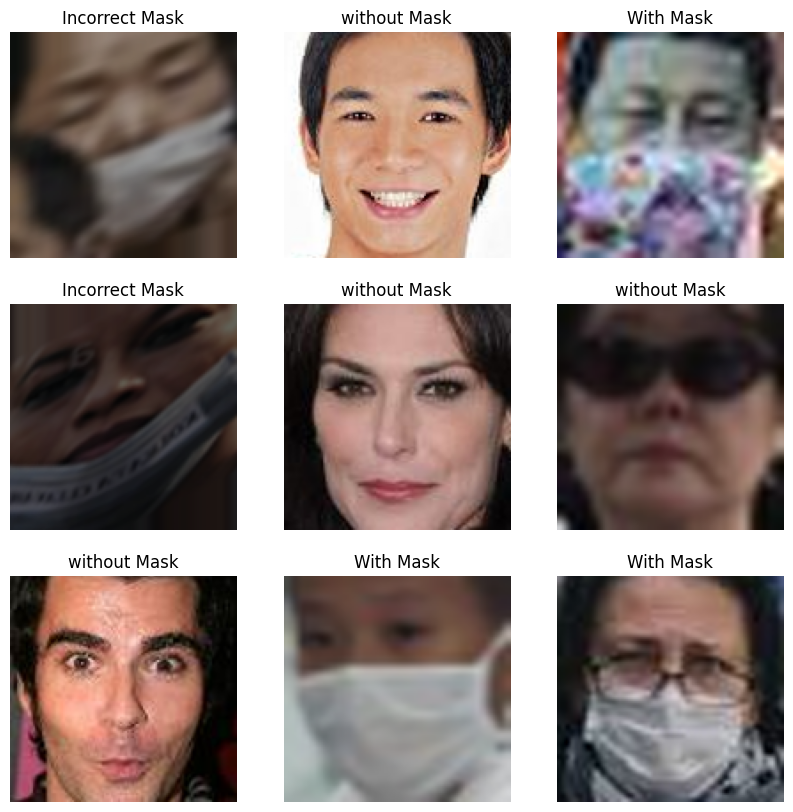

In [ ]:
# plot some images
plt.figure(figsize=(10,10))
for i in range(9):
    n=np.random.randint(0, len(X))
    plt.subplot(3,3,i+1)
    plt.imshow(X[n])
    plt.title(face_Mask_labels[y[n]])
    plt.axis('off')

## Data Preparation

In [ ]:
# split data into train and test 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# # normalize data
# X_train = X_train / 255
# X_test = X_test / 255

# one hot encode target
from keras.utils import to_categorical
y_train_to_categorical = to_categorical(y_train)
y_test_to_categorical = to_categorical(y_test)

print(X_train.shape, X_test.shape, y_train_to_categorical.shape, y_test_to_categorical.shape)

(7185, 128, 128, 3) (1797, 128, 128, 3) (7185, 3) (1797, 3)


In [ ]:
from keras.applications import mobilenet_v2

# Load the MobileNetV2 model
mobile_net_v2_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Freeze the already-trained layers in the model
for layer in mobile_net_v2_model.layers:
    layer.trainable = False

# add custom layers
model = Sequential()
model.add(mobile_net_v2_model)
model.add(GlobalAveragePooling2D())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
Total params: 2257984 (8.61 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
feature_train = model.predict(X_train)
feature_test = model.predict(X_test)

57/57 [==============================] - 1s 20ms/step


In [ ]:
print(feature_train.shape, feature_test.shape)

(7185, 1280) (1797, 1280)


In [ ]:
# Flatten extracted features
flat_train = feature_train.reshape(feature_train.shape[0], -1)
flat_test = feature_test.reshape(feature_test.shape[0], -1)

In [ ]:
print(flat_train.shape, flat_test.shape)

(7185, 1280) (1797, 1280)


## Genatic Algorithm
> is a metaheuristic inspired by the process of natural selection that belongs to the larger class of evolutionary algorithms (EA). Genetic algorithms are commonly used to generate high-quality solutions to optimization and search problems by relying on biologically inspired operators such as mutation, crossover and selection.

In [ ]:
# use genatic algorithm to find best features to use
from sklearn.svm import SVC
# Genetic Algorithm Parameters
POP_SIZE = 5
GENES = flat_train.shape[1]
GENERATIONS = 500
MUTATION_RATE = 0.01
CROSSOVER_RATE = 0.7
AVERAGE_ACC = [] # Average accuracy of each generation

# Initialize population
def initialize_population(population_size, genes):
    return np.random.choice([0, 1], size=(population_size, genes))

# Evaluate fitness using nn classifier
def evaluate_fitness(population, X_train, X_test, y_train, y_test):
    fitness_values = []
    for chromosome in population:
        selected_features = np.where(chromosome == 1)[0]
        if len(selected_features) == 0:
            fitness_values.append(0)
            continue
        X_train_selected = X_train[:, selected_features]
        X_test_selected = X_test[:, selected_features]
        model = SVC(kernel='poly', C=1)
        model.fit(X_train_selected, y_train)
        test_acc = model.score(X_test_selected, y_test)
        print('Acc:', test_acc)
        fitness_values.append(test_acc)

    return np.array(fitness_values)

# Perform crossover
def crossover(parent1, parent2):
    crossover_point = np.random.randint(0, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Perform mutation
def mutate(child):
    mutation_mask = np.random.rand(len(child)) < MUTATION_RATE
    child[mutation_mask] = 1 - child[mutation_mask]  # Flip the bits
    return child

# Main Genetic Algorithm
def genetic_algorithm(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    population = initialize_population(POP_SIZE, GENES)

    for generation in range(GENERATIONS):
        print(f'=========================================== generation:{generation} =========================================== ')
        fitness_values = evaluate_fitness(population, X_train, X_test, y_train, y_test)
        selected_indices = np.argsort(fitness_values)[::-1][:int(POP_SIZE * CROSSOVER_RATE)]

        new_population = []
        AVERAGE_ACC.append(np.mean(fitness_values))
        # Perform crossover and mutation
        for _ in range(0, POP_SIZE, 2):
            parent1 = population[np.random.choice(selected_indices)]
            parent2 = population[np.random.choice(selected_indices)]
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1)
            child2 = mutate(child2)
            new_population.extend([child1, child2])

        population = np.array(new_population)

    best_individual = population[np.argmax(fitness_values)]
    selected_features = np.where(best_individual == 1)[0]
    return selected_features

# usage
selected_features = genetic_algorithm(flat_train, y_train)
print("Selected Features:", selected_features)

=========================================== generation:0 =========================================== 
Acc: 0.9819067501739736
Acc: 0.9819067501739736
Acc: 0.9791231732776617
Acc: 0.9819067501739736
Acc: 0.9832985386221295
=========================================== generation:1 =========================================== 
Acc: 0.9819067501739736
Acc: 0.9819067501739736
Acc: 0.9832985386221295
Acc: 0.9819067501739736
Acc: 0.9846903270702854
Acc: 0.9798190675017397
=========================================== generation:2 =========================================== 
Acc: 0.9805149617258176
Acc: 0.9791231732776617
Acc: 0.9819067501739736
Acc: 0.9832985386221295
Acc: 0.9846903270702854
Acc: 0.9860821155184412
=========================================== generation:3 =========================================== 
Acc: 0.9853862212943633
Acc: 0.9846903270702854
Acc: 0.9839944328462074
Acc: 0.9846903270702854
Acc: 0.9853862212943633
Acc: 0.9853862212943633
========================================

In [ ]:
# Function to check the best features
def check_best_features(X, y, selected_features):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    model = SVC(kernel='poly', C=1)
    model.fit(X_train_selected, y_train)
    test_acc = model.score(X_test_selected, y_test)
    return test_acc

# Usage
selected_features = genetic_algorithm(flat_train, y_train)
print("Selected Features:", selected_features)

# Check the performance with the best features
accuracy = check_best_features(flat_train, y_train, selected_features)
print("Accuracy with selected features:", accuracy)

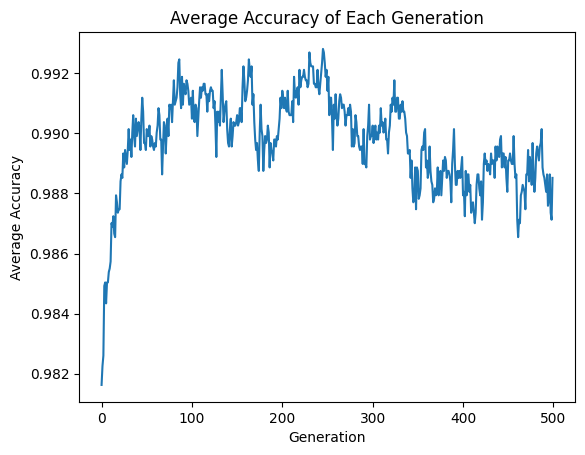

In [ ]:
# plot the average accuracy of each generation
plt.plot(AVERAGE_ACC)
plt.xlabel('Generation')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy of Each Generation')
plt.show()

In [ ]:
flat_train[:, selected_features].shape

(7185, 685)

In [ ]:
flat_train_selected_features=flat_train[:, selected_features]
flat_test_selected_features=flat_test[:, selected_features]

## Tarin svm model on selected features

In [ ]:
# tarin svm model on all features
model = SVC(kernel='poly', C=1)
model.fit(flat_train_selected_features, y_train)
test_acc = model.score(flat_test_selected_features, y_test)
print('Acc:', test_acc)

Acc: 0.9860879243183083


## Predictions on test data

(1797,)


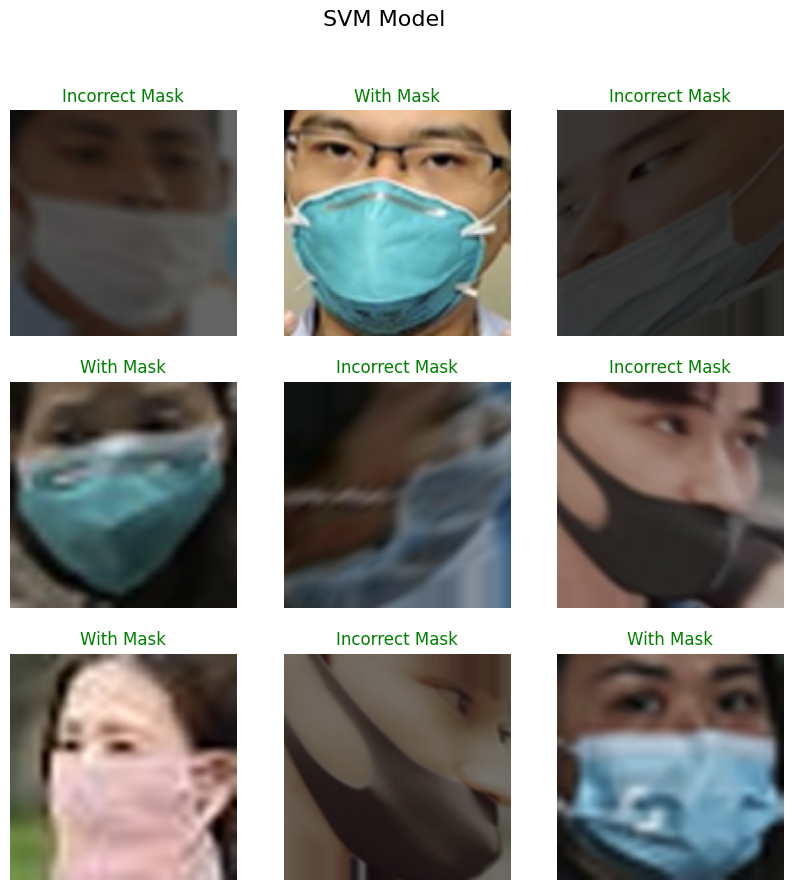

In [ ]:
# predict on test data
predictions = model.predict(flat_test_selected_features)
print(predictions.shape)

# plot the results
plt.figure(figsize=(10,10))
for i in range(9):
    n=np.random.randint(0, len(predictions))
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[n])
    plt.title(f'{face_Mask_labels[predictions[n]]}',color="red" if y_test[n]!=predictions[n] else "green")
    plt.suptitle('SVM Model', fontsize=16)
    plt.axis('off')


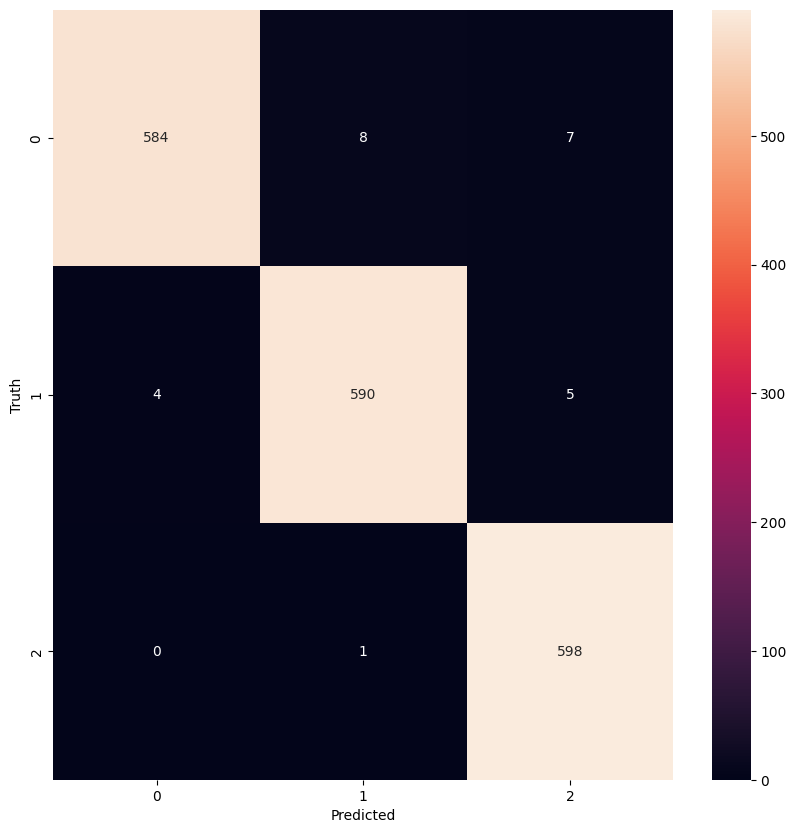

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
# heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       599
           1       0.98      0.98      0.98       599
           2       0.98      1.00      0.99       599

    accuracy                           0.99      1797
   macro avg       0.99      0.99      0.99      1797
weighted avg       0.99      0.99      0.99      1797



##CFO

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy evaluate_fitness function (to be replaced with the actual function)
def evaluate_fitness_cfo(population, X_train, X_test, y_train, y_test):
    # Here, you would train a model using X_train and y_train for each agent in the population
    # and evaluate it using X_test and y_test, returning the fitness score for each agent.
    # For this example, let's assume it returns random accuracy values.
    return np.random.uniform(0, 1, len(population))

# CFO parameters
num_agents = 50        # Number of agents
num_dimensions = 5     # Dimensionality of the problem
max_iterations = 500   # Number of iterations
G = 1.0                # Gravitational constant
damping = 0.99         # Damping factor
average_acc_cfo = []   # Average accuracy of each generation for CFO

# Placeholder data (to be replaced with actual data)
X_train = np.random.rand(100, num_dimensions)
X_test = np.random.rand(50, num_dimensions)
y_train = np.random.randint(0, 2, 100)
y_test = np.random.randint(0, 2, 50)

# Initialize agent positions and velocities
agents = np.random.uniform(-10, 10, (num_agents, num_dimensions))
velocities = np.zeros((num_agents, num_dimensions))
best_positions = np.copy(agents)
best_scores = evaluate_fitness_cfo(agents, X_train, X_test, y_train, y_test)

# Main CFO loop
for iteration in range(max_iterations):
    # Calculate forces
    forces = np.zeros_like(agents)
    for i in range(num_agents):
        for j in range(num_agents):
            if i != j:
                r = agents[j] - agents[i]
                distance = np.linalg.norm(r)
                if distance > 1e-5:  # Avoid division by zero
                    fitness_diff = best_scores[j] - best_scores[i]
                    force_magnitude = G * fitness_diff / distance
                    force_direction = r / distance
                    forces[i] += force_magnitude * force_direction

    # Update velocities and positions
    velocities = velocities * damping + forces
    agents += velocities

    # Apply boundary conditions (if any)
    agents = np.clip(agents, -10, 10)

    # Evaluate new positions
    scores = evaluate_fitness_cfo(agents, X_train, X_test, y_train, y_test)

    # Update best known positions
    for i in range(num_agents):
        if scores[i] > best_scores[i]:  # Assuming higher fitness is better
            best_scores[i] = scores[i]
            best_positions[i] = agents[i]

    average_acc_cfo.append(np.mean(best_scores))

    # Print progress
    best_score = max(best_scores)
    print(f"Iteration {iteration+1}/{max_iterations}, Best Score: {best_score}")

# Final best solution
best_index = np.argmax(best_scores)
best_solution = best_positions[best_index]
print("Best Solution (CFO):", best_solution)
print("Best Score (CFO):", best_scores[best_index])

Iteration 1/500, Best Score: 0.9814915422795882
Iteration 2/500, Best Score: 0.9814915422795882
Iteration 3/500, Best Score: 0.9819090192113612
Iteration 4/500, Best Score: 0.9819090192113612
Iteration 5/500, Best Score: 0.9819090192113612
Iteration 6/500, Best Score: 0.9835348940522164
Iteration 7/500, Best Score: 0.9843702880936436
Iteration 8/500, Best Score: 0.9868189360835634
Iteration 9/500, Best Score: 0.9868189360835634
Iteration 10/500, Best Score: 0.9868189360835634
Iteration 11/500, Best Score: 0.9938632415084117
Iteration 12/500, Best Score: 0.9938632415084117
Iteration 13/500, Best Score: 0.9938632415084117
Iteration 14/500, Best Score: 0.9938632415084117
Iteration 15/500, Best Score: 0.9938632415084117
Iteration 16/500, Best Score: 0.9938632415084117
Iteration 17/500, Best Score: 0.9938632415084117
Iteration 18/500, Best Score: 0.9938632415084117
Iteration 19/500, Best Score: 0.9938632415084117
Iteration 20/500, Best Score: 0.9938632415084117
Iteration 21/500, Best Score:

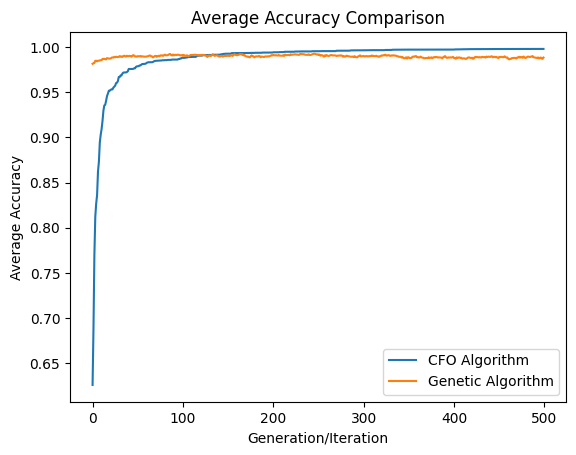

In [ ]:
# Plot the average accuracy of each generation for both algorithms
plt.plot(average_acc_cfo, label='CFO Algorithm')
plt.plot(AVERAGE_ACC, label='Genetic Algorithm')
plt.xlabel('Generation/Iteration')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy Comparison')
plt.legend()
plt.show()